### Predicting Car Prices using K-Nearest Neighbors

Applied Machine learning workflow to predict a car's market price using its attributes. 
For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.



In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [28]:
columns= ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars= pd.read_csv('imports-85.data', names= columns)

In [29]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [30]:
import numpy as np
values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[values_cols]
num_cars.replace('?', np.nan, inplace=True)

In [31]:
num_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


In [32]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [33]:
num_cars= num_cars.astype('float')

In [34]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [35]:
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [36]:
# As we gonna use price col as target col, so we can remove those 4 missing values directly.  
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [37]:
# For other missing value columns we're gonna replace them with average values from particular column.
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [38]:
normalized_cars= (num_cars-num_cars.mean())/num_cars.std()
normalized_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.036224
1,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.414350
2,0.0,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,0.414350


In [39]:
normalized_cars['price']= num_cars['price']
normalized_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.0,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def knn_train_test(feature_col, target_col, df):
    knn= KNeighborsRegressor()
    
    np.random.seed(1)
    
    index = np.random.permutation(df.index)
    df_new = df.reindex(index)
    index_new = int(len(df_new) / 2)
    train_set= df_new[0:index_new]
    test_set= df_new[index_new:]
    
    knn.fit(train_set[[feature_col]], train_set[target_col])
    
    predictions= knn.predict(test_set[[feature_col]])
    
    mse= mean_squared_error(test_set[target_col], predictions)
    rmse= mse ** (1/2)
    return rmse    

In [41]:
knn_train_test('highway-mpg','price',normalized_cars)

4625.047587445843

In [42]:
rmses= dict()
train_cols= normalized_cars.columns.drop('price')
for column in train_cols:
    rmse= knn_train_test(column,'price',normalized_cars)
    rmses[column]= rmse
    
rmses    

{'bore': 6793.0574839170895,
 'city-mpg': 4754.637378183515,
 'compression-rate': 6606.571345933599,
 'curb-weight': 4453.680702653493,
 'engine-size': 3297.6997444813674,
 'height': 8132.467731772246,
 'highway-mpg': 4625.047587445843,
 'horsepower': 4047.376554982472,
 'length': 5429.644739577333,
 'normalized-losses': 7337.2848203845515,
 'peak-rpm': 7643.0703228739185,
 'stroke': 8006.096427246941,
 'wheel-base': 5461.490335934409,
 'width': 4772.510209128695}

In [43]:
def knn_train_test_k(feature_col, target_col, df):
    
    np.random.seed(1)
    
    index = np.random.permutation(df.index)
    df_new = df.reindex(index)
    index_new = int(len(df_new) / 2)
    train_set= df_new[0:index_new]
    test_set= df_new[index_new:]
    
    k_values= [1,3,5,7,8]
    rmses_k= dict()
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_set[[feature_col]], train_set[target_col])
    
        predictions= knn.predict(test_set[[feature_col]])
    
        mse= mean_squared_error(test_set[target_col], predictions)
        rmse= mse ** (1/2)
        rmses_k[k]= rmse
    return rmses_k    

In [44]:
rmses_k_results= dict()
train_cols= normalized_cars.columns.drop('price')
for column in train_cols:
    rmse= knn_train_test_k(column,'price',normalized_cars)
    rmses_k_results[column]= rmse
    
rmses_k_results 

{'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  8: 6792.744561691074},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4754.637378183515,
  7: 5035.456896910003,
  8: 5196.483386127775},
 'compression-rate': {1: 8083.070177540802,
  3: 7379.623321663306,
  5: 6606.571345933599,
  7: 6732.032905446027,
  8: 6956.633915508703},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  8: 4491.9937326828085},
 'engine-size': {1: 3227.659787364569,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  8: 3671.0225867538165},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  8: 7555.070568029278},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.908507167689,
  5: 4625.047587445843,
  7: 4722.975580907234,
  8: 5002.139078418263},
 'horsepower': {1: 4170.054848037801,
  3: 4010.52180323

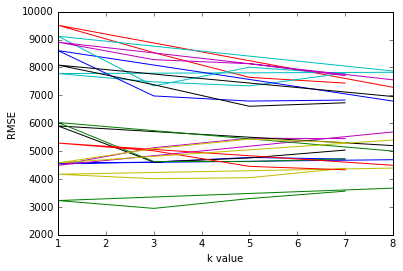

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, j in rmses_k_results.items():
    x= list(j.keys())
    y= list(j.values())    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [46]:
feature_avg_rmse = {}

for i, j in rmses_k_results.items():
    x= list(j.keys())
    avg= np.mean(list(j.values())) 
    feature_avg_rmse[i]= avg
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_avg_rmse = series_avg_rmse.sort_values()
print(sorted_avg_rmse)

sorted_features = sorted_avg_rmse.index

engine-size          3341.311801
horsepower           4200.716429
width                4669.268127
curb-weight          4715.144458
highway-mpg          5000.733144
city-mpg             5099.180336
length               5159.775670
wheel-base           5242.051734
compression-rate     7151.586333
bore                 7198.876350
normalized-losses    7643.456128
stroke               8020.214085
peak-rpm             8081.917163
height               8114.707873
dtype: float64


In [47]:
def knn_train_test(feature_cols, target_col, df):
    
    np.random.seed(1)
    
    index = np.random.permutation(df.index)
    df_new = df.reindex(index)
    index_new = int(len(df_new) / 2)
    train_set= df_new[0:index_new]
    test_set= df_new[index_new:]
    
    k_values= [5]
    rmses_k= dict()
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_set[feature_cols], train_set[target_col])
    
        predictions= knn.predict(test_set[feature_cols])
    
        mse= mean_squared_error(test_set[target_col], predictions)
        rmse= mse ** (1/2)
        rmses_k[k]= rmse
    return rmses_k   

k_rmse_results = {}

for i in range(2,7):
    k_rmse_results[i]= knn_train_test(sorted_features[:i],'price',normalized_cars)

k_rmse_results

{2: {5: 2938.1306900277887},
 3: {5: 3576.5381752208214},
 4: {5: 3435.145837075945},
 5: {5: 3457.4725012114936},
 6: {5: 3415.73077323836}}

In [48]:
def knn_train_test(feature_cols, target_col, df):
    
    np.random.seed(1)
    
    index = np.random.permutation(df.index)
    df_new = df.reindex(index)
    index_new = int(len(df_new) / 2)
    train_set= df_new[0:index_new]
    test_set= df_new[index_new:]
    
    k_values= range(1,26)
    rmses_k= dict()
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_set[feature_cols], train_set[target_col])
    
        predictions= knn.predict(test_set[feature_cols])
    
        mse= mean_squared_error(test_set[target_col], predictions)
        rmse= mse ** (1/2)
        rmses_k[k]= rmse
    return rmses_k   

k_rmse_results = {}

for i in range(2,5):
    k_rmse_results[i]= knn_train_test(sorted_features[:i],'price',normalized_cars)
k_rmse_results

{2: {1: 2824.8287076781794,
  2: 2615.442453055988,
  3: 2676.6521480521455,
  4: 2831.7841198370656,
  5: 2938.1306900277887,
  6: 3128.516968715745,
  7: 3204.0554389097565,
  8: 3459.8826047221833,
  9: 3715.847780310613,
  10: 3980.307424292901,
  11: 4151.348212046468,
  12: 4231.233582321214,
  13: 4321.751665703992,
  14: 4366.489859575597,
  15: 4487.120412964203,
  16: 4591.609216968047,
  17: 4683.284404125849,
  18: 4739.084337496269,
  19: 4784.099214347852,
  20: 4777.706746763483,
  21: 4816.3918959481325,
  22: 4806.480777296786,
  23: 4832.819314595003,
  24: 4883.724636768665,
  25: 4975.5110313113555},
 3: {1: 3384.9422637192606,
  2: 3261.939437825234,
  3: 3142.577321948092,
  4: 3306.01101075266,
  5: 3576.5381752208214,
  6: 3709.4813226235947,
  7: 3610.411169953427,
  8: 3694.9374649086276,
  9: 3848.9692035290686,
  10: 3973.5807329145964,
  11: 4098.883214686969,
  12: 4217.8064717212055,
  13: 4298.670431349281,
  14: 4313.880284852934,
  15: 4276.18876789342

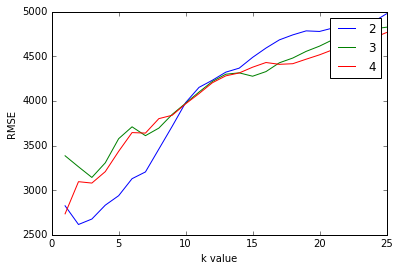

In [49]:
for i, j in k_rmse_results.items():
    x= list(j.keys())
    y= list(j.values())    
    plt.plot(x,y, label="{}".format(i))
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()    